In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm


In [29]:
image_dir=r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke"
no_fire_and_smoke_images=os.listdir(image_dir+ '/no_fire_and_smoke')
fire_and_smoke_high_intensity_images=os.listdir(image_dir+ '/High_intensity')
fire_and_smoke_low_intensity_images=os.listdir(image_dir+ '/Low_intensity')
print("--------------------------------------\n")

--------------------------------------



In [30]:
print('The length of NO Fire and Smoke images is',len(no_fire_and_smoke_images))
print('The length of Fire and Smoke High intensity images is',len(fire_and_smoke_high_intensity_images))
print('The length of Fire and Smoke Low intensity images is',len(fire_and_smoke_low_intensity_images))
print("--------------------------------------\n")


The length of NO Fire and Smoke images is 963
The length of Fire and Smoke High intensity images is 647
The length of Fire and Smoke Low intensity images is 328
--------------------------------------



In [31]:
dataset=[]
label=[]
img_siz=(128,128)

In [32]:
# Base directory containing all image categories
image_dir = r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke"

# Define categories and their corresponding labels
categories = {
    "no_fire_and_smoke": 0,
    "High_intensity": 2,
    "Low_intensity": 1
}

In [33]:
# Process each category
for category, class_label in categories.items():
    print(f"Processing category: {category}")
    
    # Get the path to the current category folder
    category_dir = os.path.join(image_dir, category)  # Combine base directory and category
    image_names = os.listdir(category_dir)  # Use category_dir, NOT categories
    

Processing category: no_fire_and_smoke
Processing category: High_intensity
Processing category: Low_intensity


In [34]:
for i, image_name in tqdm(enumerate(fire_and_smoke_high_intensity_images), desc="Fire and Smoke High Intensity"):
    if image_name.split('.')[1].lower() == 'jpg':  # Ensure case-insensitive check for 'jpg'
        # Construct the full path for high intensity images
        image_path = os.path.join(image_dir, 'High_intensity', image_name)  # Use os.path.join for better path handling
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # Check if the image is loaded correctly
        if image is None:
            print(f"Failed to read image: {image_path}")
            continue
        
        # Convert image to RGB and resize
        image = Image.fromarray(image, 'RGB')
        image = image.resize(img_siz)
        
        # Append the image to the dataset with the label for high intensity (class label 2)
        dataset.append(np.array(image))
        label.append(2)  # Class label 2 for High Intensity images


Fire and Smoke High Intensity: 647it [00:06, 96.95it/s] 


In [35]:
for i, image_name in tqdm(enumerate(no_fire_and_smoke_images), desc="No Fire And Smoke"):
    if image_name.split('.')[1].lower() == 'jpg':  # Ensure case-insensitive check for 'jpg'
        # Construct the full path for low intensity images
        image_path = os.path.join(image_dir, 'no_fire_and_smoke', image_name)  # Use os.path.join for better path handling
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # Check if the image is loaded correctly
        if image is None:
            print(f"Failed to read image: {image_path}")
            continue
        
        # Convert image to RGB and resize
        image = Image.fromarray(image, 'RGB')
        image = image.resize(img_siz)
        
        # Append the image to the dataset with the label for low intensity (class label 1)
        dataset.append(np.array(image))
        label.append(0)  # Class label 1 for Low Intensity images


No Fire And Smoke: 963it [00:05, 177.36it/s]


In [36]:
for i, image_name in tqdm(enumerate(fire_and_smoke_low_intensity_images), desc="Fire and Smoke Low Intensity"):
    if image_name.split('.')[1].lower() == 'jpg':  # Ensure case-insensitive check for 'jpg'
        # Construct the full path for low intensity images
        image_path = os.path.join(image_dir, 'Low_intensity', image_name)  # Use os.path.join for better path handling
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # Check if the image is loaded correctly
        if image is None:
            print(f"Failed to read image: {image_path}")
            continue
        
        # Convert image to RGB and resize
        image = Image.fromarray(image, 'RGB')
        image = image.resize(img_siz)
        
        # Append the image to the dataset with the label for low intensity (class label 1)
        dataset.append(np.array(image))
        label.append(1)  # Class label 1 for Low Intensity images


Fire and Smoke Low Intensity: 328it [00:02, 119.42it/s]


In [37]:
# Convert dataset and label lists to numpy arrays
dataset = np.array(dataset, dtype="float32") / 255.0  # Normalize pixel values (optional)
label = np.array(label)

print("Dataset and labels have been successfully converted to numpy arrays!")


Dataset and labels have been successfully converted to numpy arrays!


In [39]:
print("--------------------------------------\n")
print('Dataset Length: ',len(dataset))
print('Label Length: ',len(label))
print("--------------------------------------\n")


--------------------------------------

Dataset Length:  1937
Label Length:  1937
--------------------------------------



In [40]:


print("--------------------------------------\n")
print("Train-Test Split")

# Splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)

print("--------------------------------------\n")


--------------------------------------

Train-Test Split
--------------------------------------



In [41]:
print("--------------------------------------\n")
print("Normalaising the Dataset. \n")


--------------------------------------

Normalaising the Dataset. 



In [42]:
# Normalize the dataset using TensorFlow's normalize function
x_train = tf.keras.utils.normalize(x_train, axis=1)  # Normalize training images
x_test = tf.keras.utils.normalize(x_test, axis=1)    # Normalize test images

In [43]:
import tensorflow as tf

print("--------------------------------------\n")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    # Change the number of neurons in the output layer to the number of classes (e.g., 3 classes)
    tf.keras.layers.Dense(3, activation='softmax')  # Use 'softmax' for multi-class classification
])

print("--------------------------------------\n")
model.summary()
print("--------------------------------------\n")


--------------------------------------

--------------------------------------



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    32,514,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,648,323 (124.54 MB)

 Trainable params: 32,648,323 (124.54 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------



In [44]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)


In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer encoded labels
              metrics=['accuracy'])


In [46]:
import numpy as np
print("Unique labels in y_train:", np.unique(y_train))


Unique labels in y_train: [0 1 2]


In [47]:
print("--------------------------------------\n")
print("Training Started.\n")

# Train the model
class_weights = {0: 1.0, 1: 1.5, 2: 1.0}  # Adjust the weights for each class
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1, class_weight=class_weights)


print("Training Finished.\n")
print("--------------------------------------\n")


--------------------------------------

Training Started.

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 816ms/step - accuracy: 0.4179 - loss: 1.3683 - val_accuracy: 0.8387 - val_loss: 0.5989
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 611ms/step - accuracy: 0.8019 - loss: 0.6784 - val_accuracy: 0.9226 - val_loss: 0.2862
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 607ms/step - accuracy: 0.9054 - loss: 0.3671 - val_accuracy: 0.9677 - val_loss: 0.1380
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 627ms/step - accuracy: 0.9491 - loss: 0.1994 - val_accuracy: 0.9677 - val_loss: 0.1263
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 614ms/step - accuracy: 0.9671 - loss: 0.1340 - val_accuracy: 0.9484 - val_loss: 0.1120
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 610ms/step - accuracy: 0.9713 - loss: 0.0900 - val_accuracy: 0.9613 - val_loss: 0.0927
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 622ms/step - accuracy: 0.9855 - loss: 0.0708 - val_accuracy: 0.9548 - val_loss: 0.0806
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 623

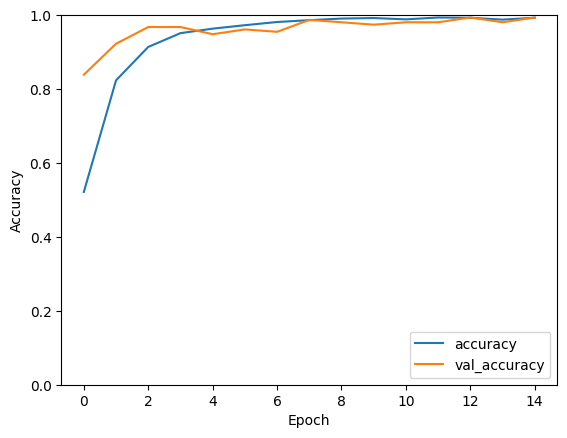

In [48]:
import matplotlib.pyplot as plt

# Plot and save accuracy
plt.plot(history.epoch, history.history['accuracy'], label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val_accuracy')

# Label the axes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Set the limits for the y-axis
plt.ylim([0, 1])

# Add a legend
plt.legend(loc='lower right')

# Save the plot as an image
plt.savefig(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\result\fire_and_smoke_sample_accuracy_plot.png")

# Optionally, show the plot
plt.show()


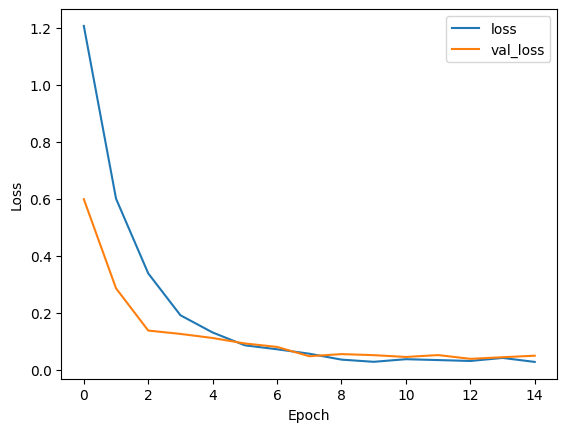

In [49]:
# Clear the previous plot
plt.clf()

# Plot and save loss
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')

# Label the axes
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a legend
plt.legend(loc='upper right')

# Save the plot as an image
plt.savefig(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\result\fire_and_smoke_sample_loss_plot.png")

# Optionally, show the plot
plt.show()


In [50]:
print(f"y_test shape: {y_test.shape}")


y_test shape: (388,)


In [51]:
print("--------------------------------------\n")
print("Model Evaluation Phase.\n")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {round(accuracy * 100, 2)}')
print("--------------------------------------\n")

# Predict the classes for the test set
y_pred = model.predict(x_test)

# Get the predicted class by selecting the class with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true = y_test  # No need to use np.argmax if it's already integer-encoded
 

# Print the classification report
print('Classification Report\n', classification_report(y_true, y_pred_classes))
print("--------------------------------------\n")

--------------------------------------

Model Evaluation Phase.

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9799 - loss: 0.0740 
Accuracy: 97.68
--------------------------------------

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       191
           1       1.00      0.86      0.93        59
           2       0.94      1.00      0.97       138

    accuracy                           0.98       388
   macro avg       0.98      0.95      0.96       388
weighted avg       0.98      0.98      0.98       388

--------------------------------------



In [52]:
model.save(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\result\cnn_fire_and_smoke.keras")


print("--------------------------------------\n")
print("Model Prediction.\n")

--------------------------------------

Model Prediction.



In [53]:
def make_prediction(img, model):
    # Preprocess the image
    img = Image.fromarray(img)
    img = img.resize((128, 128))  # Resize the image to the expected input size
    img = np.array(img)
    input_img = np.expand_dims(img, axis=0)

    # Normalize the image if required
    input_img = tf.keras.utils.normalize(input_img, axis=1)

    # Make prediction
    res = model.predict(input_img)

    # Print the output probabilities to see the model's decision
    print("Model output probabilities:", res)

    # Get the class with the highest probability
    predicted_class = np.argmax(res, axis=1)[0]
    prediction_prob = np.max(res, axis=1)[0]  # Get the highest probability

    # Print the predicted class label and probability
    if predicted_class == 0:
        print("Class 0: No Fire and Smoke")
    elif predicted_class == 1:
        print("Class 1: Low Intensity Fire and Smoke")
    elif predicted_class == 2:
        print("Class 2: High Intensity Fire and Smoke")
    else:
        print("Unknown class")

    return predicted_class, prediction_prob


In [54]:
make_prediction(cv2.imread(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke\High_intensity\19.jpg"),model)
print("--------------------------------------\n")
make_prediction(cv2.imread(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke\Low_intensity\567.jpg"),model)
print("--------------------------------------\n")
make_prediction(cv2.imread(r"C:\Users\remya\OneDrive\Desktop\fire_and_smoke_original\fire_and_smoke\no_fire_and_smoke\25.jpg"),model)
print("--------------------------------------\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model output probabilities: [[2.5154633e-04 2.8205616e-04 9.9946648e-01]]
Class 2: High Intensity Fire and Smoke
--------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model output probabilities: [[3.2830542e-07 9.9917608e-01 8.2354934e-04]]
Class 1: Low Intensity Fire and Smoke
--------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model output probabilities: [[9.9999988e-01 3.6732001e-08 1.4557745e-07]]
Class 0: No Fire and Smoke
--------------------------------------

